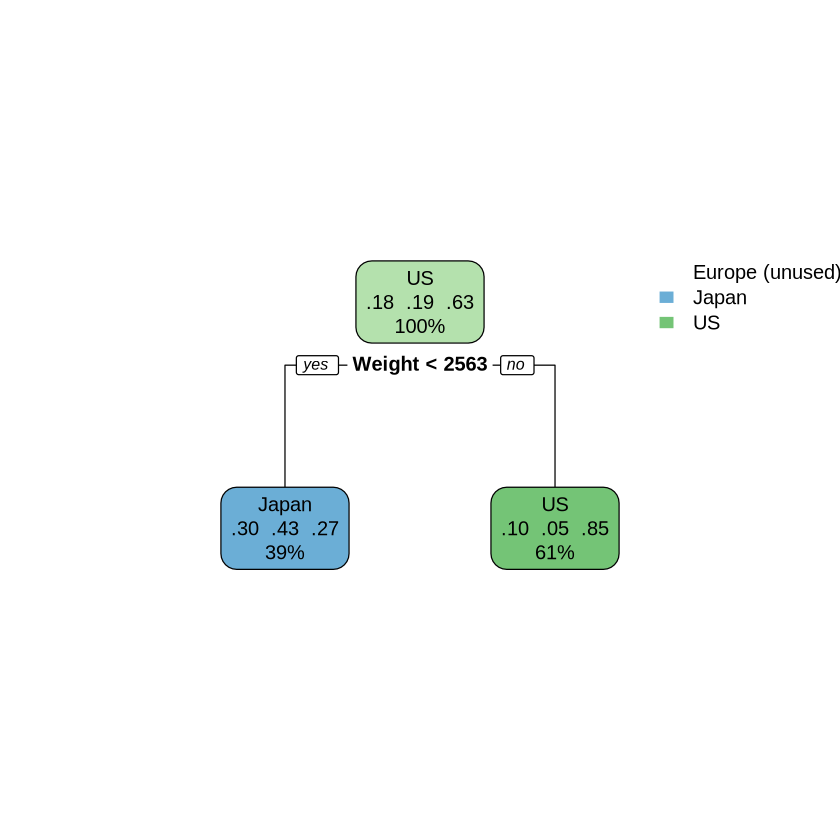

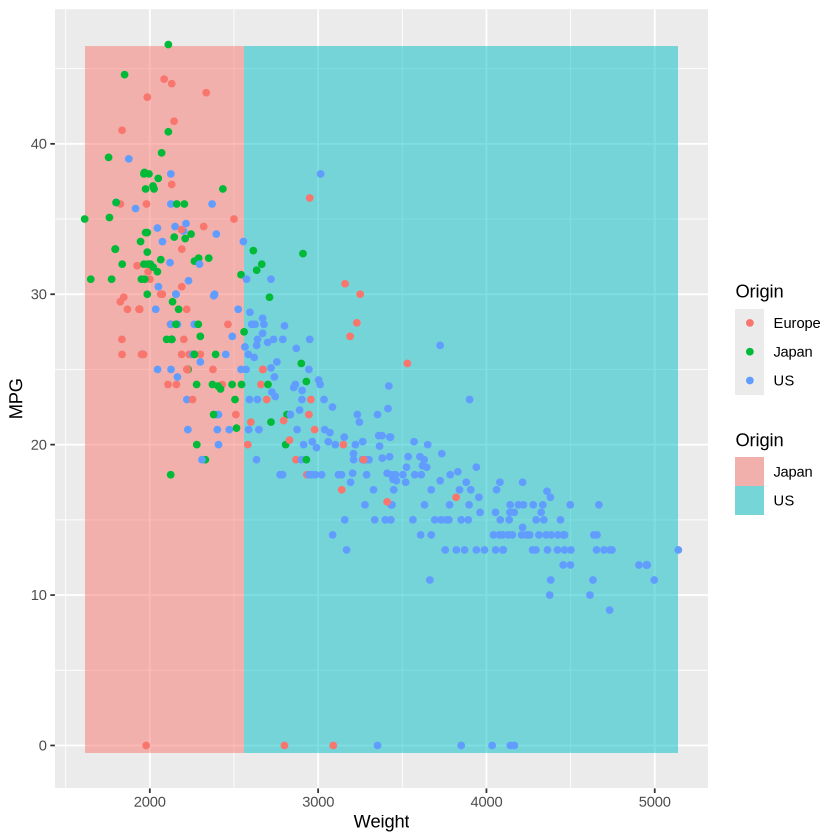

In [2]:
library(data.table)
library(caret)
library(rpart.plot)

dt <- fread("data/cars.csv")
dt[, Origin := as.factor(Origin)]

# train decision tree
model <- train(Origin ~ Weight + MPG,
    data = dt, method = "rpart",
    tuneGrid = data.frame(cp = 0.1)
)

# plot decision tree finalModel
rpart.plot(model$finalModel)

# new data with predictions
dt.all <- expand.grid(
  Weight = seq(min(dt$Weight), max(dt$Weight), 1),
  MPG = seq(min(dt$MPG), max(dt$MPG), 1))
dt.all$Origin <- predict(model, newdata = dt.all)

# plot decision limit
g <- ggplot(mapping = aes(Weight, MPG)) + 
  geom_raster(mapping = aes(fill = Origin), data = dt.all, alpha = 0.5) + 
  geom_point(mapping = aes(color = Origin), data = dt)
print(g)